# TME 6 - Approches interprétables "by design"

## 1. Mesures de discrimination

### 1.1 Tracer les différentes mesures de discrimination

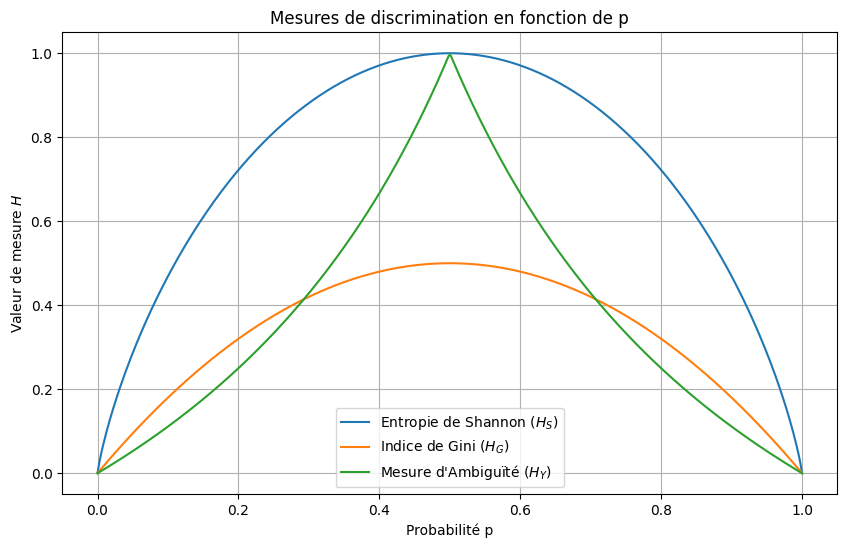

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Définition des fonctions pour chaque mesure de discrimination

def shannon_entropy(p):
    # Éviter les valeurs de log(0) en définissant l'entropie de 0 log(0) comme 0
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p)) if p != 0 and p != 1 else 0


def gini_index(p):
    return 2 * p * (1 - p)


def ambiguity_measure(p):
    # Éviter les valeurs de log(0) et les divisions par zéro
    if p > 1/2:
        return np.log2(2) * (1-p) / p
    else:
        return np.log2(2) * p / (1 - p)


# Générer des valeurs de p entre 0 et 1
p_values = np.linspace(0, 1, 400)

# Calculer les valeurs des mesures pour chaque p
hs_values = [shannon_entropy(p) for p in p_values]  # Entropie de Shannon
hg_values = [gini_index(p) for p in p_values]  # Indice de Gini
hy_values = [ambiguity_measure(p) for p in p_values]  # Mesure d'ambiguïté

# Création du graphique
plt.figure(figsize=(10, 6))

plt.plot(p_values, hs_values, label='Entropie de Shannon ($H_S$)')
plt.plot(p_values, hg_values, label='Indice de Gini ($H_G$)')
plt.plot(p_values, hy_values, label="Mesure d'Ambiguïté ($H_Y$)")

plt.title('Mesures de discrimination en fonction de p')
plt.xlabel('Probabilité p')
plt.ylabel('Valeur de mesure $H$')
plt.legend()
plt.grid(True)
plt.show()

### 1.2. Lien entre les mesures de discrimitation

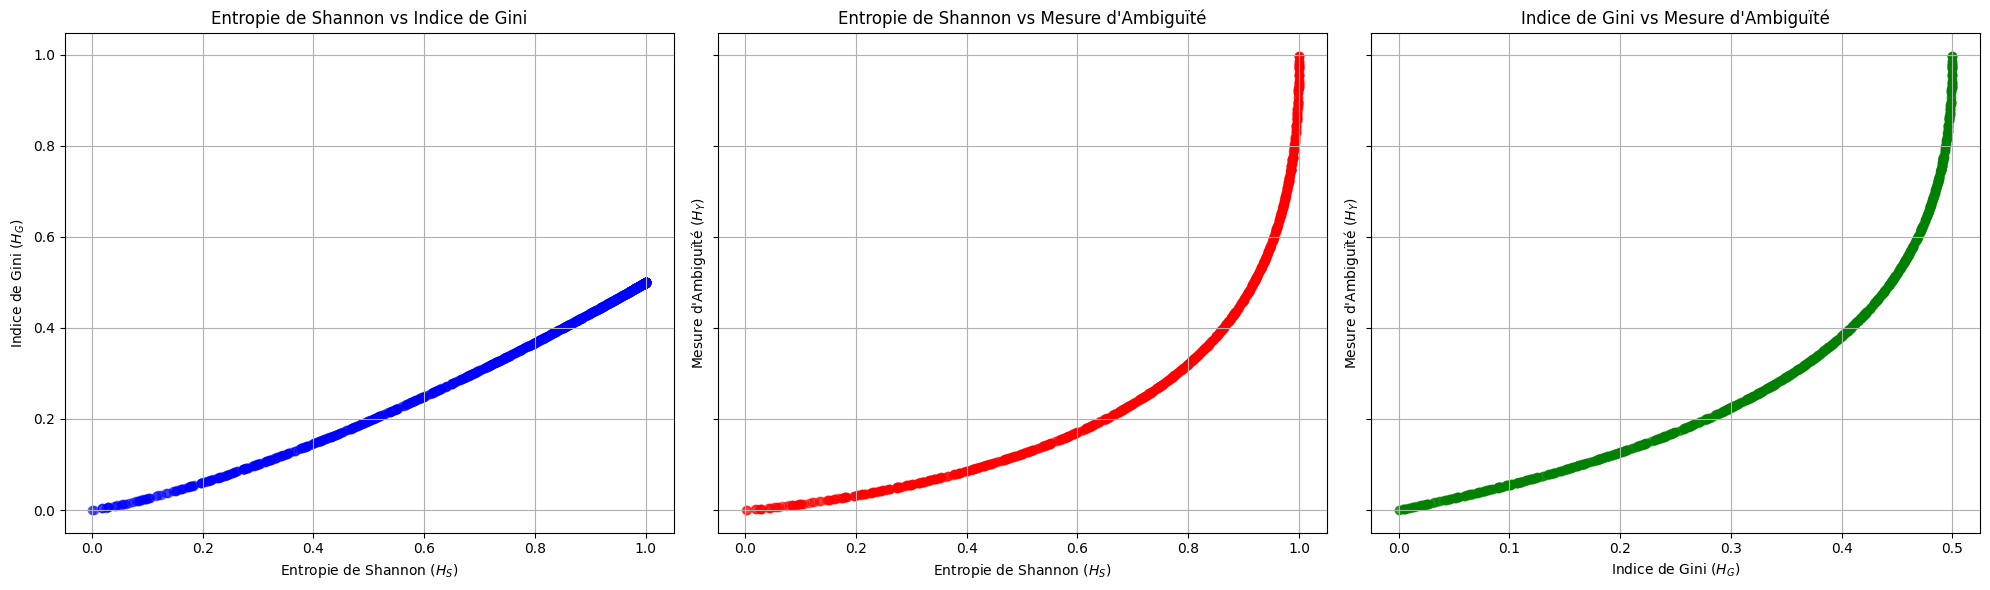

In [2]:
import random

# Nombre de tirages aléatoires
num_samples = 1000

# Tirer des valeurs aléatoires de p et calculer les mesures correspondantes
random_p_values = [random.uniform(0, 1) for _ in range(num_samples)]
measures = [(shannon_entropy(p), gini_index(p), ambiguity_measure(p)) for p in random_p_values]

# Séparer les valeurs pour chaque mesure
hs_samples, hg_samples, hy_samples = zip(*measures)

# Création des graphiques pour comparer les mesures deux à deux
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Shannon vs Gini
axs[0].scatter(hs_samples, hg_samples, color='blue', alpha=0.5)
axs[0].set_title('Entropie de Shannon vs Indice de Gini')
axs[0].set_xlabel('Entropie de Shannon ($H_S$)')
axs[0].set_ylabel('Indice de Gini ($H_G$)')
axs[0].grid(True)

# Shannon vs Ambiguïté
axs[1].scatter(hs_samples, hy_samples, color='red', alpha=0.5)
axs[1].set_title('Entropie de Shannon vs Mesure d\'Ambiguïté')
axs[1].set_xlabel('Entropie de Shannon ($H_S$)')
axs[1].set_ylabel('Mesure d\'Ambiguïté ($H_Y$)')
axs[1].grid(True)

# Gini vs Ambiguïté
axs[2].scatter(hg_samples, hy_samples, color='green', alpha=0.5)
axs[2].set_title('Indice de Gini vs Mesure d\'Ambiguïté')
axs[2].set_xlabel('Indice de Gini ($H_G$)')
axs[2].set_ylabel('Mesure d\'Ambiguïté ($H_Y$)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

### 1.3. Etude des résultats obtenus

En observant les courbes produites, on peut déduire le rapport entre les deux mesures. 
* Gini VS Shannon : On constate que pour Gini et Shannon, la courbe est pratiquement linéaire, indiquant donc un rapport de proportionnalité entre les deux mesures.
* Shannon vs Ambiguïté : Ici la courbe ressemble à une exponentielle, c'est-à-dire que la mesure d'ambiguïté augmente exponentiellement plus vite que Shannon.
* Gini vs Ambiguïté : On remarque la même chose que précédemment ici.

## 2. Arbres de décision en présence de données symboliques
### 2.1. Arbre de décision simple sur les données `digits`

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Charger les données 'digits'
digits = datasets.load_digits()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Construire l'arbre de décision en utilisant l'entropie de Shannon comme critère
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 88.3333%


L'arbre de décision construit sur les données `digits` en utilisant l'entropie de Shannon comme critère a une précision d'environ 88.3% sur l'ensemble de test. Cela signifie que l'arbre de décision classe correctement les images environ 88.3% du temps, ce qui est une performance relativement bonne pour un modèle simple sans réglage fin.

### 2.2. Arbre de décision sur les données `elections.csv`

In [4]:
import tarfile
import os

# Extraire le fichier
PATH = "."
with tarfile.open(f'{PATH}/data.tgz', 'r:gz') as tar:
    tar.extractall(path=f"{PATH}/")

# Vérifier si le fichier 'elections.csv' est dans le répertoire extrait
extracted_files = os.listdir(f"{PATH}/data")
'elections.csv' in extracted_files

True

In [5]:
import pandas as pd

# Charger les données
PATH = f"{PATH}/data"
data_path = f'{PATH}/elections.csv'  # Chemin vers le fichier extrait
elections_data = pd.read_csv(data_path)

# Appliquer le one hot encoding
elections_encoded = pd.get_dummies(elections_data)

# Séparer les caractéristiques (features) et les étiquettes (labels)
# Nous supposons ici que la dernière colonne est l'étiquette (label). Si ce n'est pas le cas, cette étape peut nécessiter un ajustement.
X = elections_encoded.iloc[:, :-1]
y = elections_encoded.iloc[:, -1]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construire l'arbre de décision en utilisant l'entropie comme critère
decision_tree_elections = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_elections.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_elections = decision_tree_elections.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy_elections = accuracy_score(y_test, y_pred_elections)
print(f"Accuracy: {accuracy_elections * 100:.4f}%")

Accuracy: 100.0000%


L'arbre de décision, construit sur les données `elections.csv` et utilisant l'entropie de Shannon comme critère, a une précision de 100% sur l'ensemble de test. Cela signifie que, pour cet ensemble de données particulier et pour l'ensemble de test choisi, le modèle a parfaitement classé tous les échantillons.

Cependant, une précision de 100% peut parfois indiquer un surajustement, ce qui est du à la taille de notre ensemble de données (n=8). 

### 2.3 Algorithme de construction d’arbres de décision en présence de données symboliques

In [6]:
from collections import Counter
import pandas as pd


class SymbolicDecisionTree:
    def __init__(self):
        self.tree = None

    class Node:
        def __init__(self, feature=None, value=None, true_branch=None, false_branch=None, result=None):
            self.feature = feature
            self.value = value
            self.true_branch = true_branch
            self.false_branch = false_branch
            self.result = result

    def fit(self, X, y):
        training_data = pd.concat([X, y], axis=1)  # Combine features and labels
        self.tree = self.build_tree(training_data)

    def predict(self, X):
        predictions = [self.predict_single_entry(entry) for _, entry in X.iterrows()]
        return predictions

    def predict_xai(self, entry):
        explanation, _ = self.trace_tree(entry, self.tree, explanation=[])
        return explanation

    def build_tree(self, data):
        # If there's no data, or if all targets are the same, return a leaf node with the result
        if len(data) == 0:
            return self.Node()

        current_uncertainty = self.gini(data.iloc[:, -1])
        # print(data.iloc[:, -1])
        best_gain = 0
        best_criteria = None
        best_sets = None

        feature_count = len(data.columns) - 1  # number of attributes

        for col in range(feature_count):  # for each feature
            feature_values = data.iloc[:, col].unique()  # unique values
            for val in feature_values:  # for each value
                partitioned_data = self.partition(data, data.columns[col], val)

                # Information gain
                p = float(partitioned_data[0].shape[0]) / data.shape[0]
                gain = current_uncertainty - p * self.gini(partitioned_data[0].iloc[:, -1]) - (1 - p) * self.gini(partitioned_data[1].iloc[:, -1])

                if gain > best_gain and len(partitioned_data[0]) > 0 and len(partitioned_data[1]) > 0:
                    best_gain = gain
                    best_criteria = (data.columns[col], val)
                    best_sets = partitioned_data

        if best_gain > 0:
            true_branch = self.build_tree(best_sets[0])
            false_branch = self.build_tree(best_sets[1])
            return self.Node(feature=best_criteria[0], value=best_criteria[1],
                             true_branch=true_branch, false_branch=false_branch)
        else:
            # We're at a leaf, determine the outcome
            outcome = data.iloc[:, -1].value_counts().idxmax()  # most frequent class
            return self.Node(result=outcome)

    def predict_single_entry(self, entry):
        node = self.tree
        while node.result is None:
            if entry[node.feature] == node.value:
                node = node.true_branch
            else:
                node = node.false_branch
        return node.result

    def trace_tree(self, entry, node, explanation):
        if node.result is not None:
            return explanation, node.result

        if entry[node.feature] == node.value:
            explanation.append(f"{node.feature} == {node.value}")
            return self.trace_tree(entry, node.true_branch, explanation)
        else:
            explanation.append(f"{node.feature} != {node.value}")
            return self.trace_tree(entry, node.false_branch, explanation)

    def partition(self, data, feature, value):
        true_data = data[data[feature] == value]
        false_data = data[data[feature] != value]
        return (true_data, false_data)

    def gini(self, labels):
        impurity = 1
        label_counts = Counter(labels)
        for label in label_counts:
            prob_of_label = label_counts[label] / float(len(labels))
            impurity -= prob_of_label ** 2
        return impurity


# Now, let's load the 'election.csv' data and test our classifier
election_data = pd.read_csv(f'{PATH}/elections.csv')
X = election_data.iloc[:, :-1]  # all columns except the last one
y = election_data.iloc[:, -1]  # the last column

# Initialize and train the tree
tree = SymbolicDecisionTree()
tree.fit(X, y)

# Make predictions and test
predictions = tree.predict(X)
accuracy = sum(predictions == y) / len(y)
accuracy, predictions

(1.0, [1, -1, 1, -1, -1, -1, 1, -1])

### 2.4. Explication

In [7]:
# Sélectionner un échantillon de données pour l'explication
sample = X.iloc[0]  # nous prenons le premier échantillon pour l'exemple

# Obtenir l'explication de la prédiction pour cet échantillon
explanation = tree.predict_xai(sample)
explanation

['Majeur? == oui', 'Nationalite != Suisse']

In [8]:
# Sélectionner un échantillon de données pour l'explication
sample = X.iloc[1]  # nous prenons le premier échantillon pour l'exemple

# Obtenir l'explication de la prédiction pour cet échantillon
explanation = tree.predict_xai(sample)
explanation

['Majeur? != oui']

### 2.5. Sur les données *Mushrooms* 🍄

In [9]:

# Vérifier les fichiers extraits et trouver les fichiers de données "Mushrooms"
extract_folder = PATH
extracted_files = os.listdir(extract_folder)
mushroom_files = [file for file in extracted_files if file.startswith('mushroom')]

# Charger les données de chaque fichier mushroom et les combiner en un seul DataFrame
mushroom_dataframes = [pd.read_csv(os.path.join(extract_folder, file)) for file in mushroom_files]
combined_mushroom_data = pd.concat(mushroom_dataframes, ignore_index=True)

combined_mushroom_data.head()  # Afficher les premières lignes des données combinées

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,y,g,f,f,f,c,b,g,...,k,p,n,p,w,o,l,h,y,g
1,p,x,y,e,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,l
2,e,f,y,e,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,y,d
3,p,f,s,b,t,f,f,c,b,w,...,s,w,w,p,w,o,p,h,v,g
4,e,f,f,g,t,n,f,c,b,u,...,s,p,w,p,w,o,p,k,v,d


In [10]:
# Séparer les caractéristiques et les étiquettes
X_mushrooms = combined_mushroom_data.drop(columns=['class'])  # features
y_mushrooms = combined_mushroom_data['class']  # labels

# Initialiser et entraîner l'arbre de décision symbolique
mushroom_tree = SymbolicDecisionTree()
mushroom_tree.fit(X_mushrooms, y_mushrooms)

y_pred_mushrooms = decision_tree_elections.predict(X_test)

# Évaluer la précision de l'arbre de décision
accuracy_mushrooms = accuracy_score(y_test, y_pred_mushrooms)
print(f"Accuracy: {accuracy_mushrooms * 100:.4f}%")

Accuracy: 100.0000%


In [11]:

# Sélectionner un échantillon de données pour l'explication
mushroom_sample = X_mushrooms.iloc[2]  # nous prenons un échantillon pour l'exemple

# Obtenir l'explication de la prédiction pour cet échantillon
mushroom_explanation = mushroom_tree.predict_xai(mushroom_sample)
mushroom_explanation, mushroom_sample.to_dict()  # Renvoyer l'explication et les détails de l'échantillon

(['odor == n',
  'spore-print-color != r',
  'stalk-surface-below-ring != y',
  'cap-surface != g',
  'cap-shape != c',
  'gill-size != n'],
 {'cap-shape': 'f',
  'cap-surface': 'y',
  'cap-color': 'e',
  'bruises': 't',
  'odor': 'n',
  'gill-attachment': 'f',
  'gill-spacing': 'c',
  'gill-size': 'b',
  'gill-color': 'u',
  'stalk-shape': 't',
  'stalk-root': 'b',
  'stalk-surface-above-ring': 's',
  'stalk-surface-below-ring': 's',
  'stalk-color-above-ring': 'g',
  'stalk-color-below-ring': 'w',
  'veil-type': 'p',
  'veil-color': 'w',
  'ring-number': 'o',
  'ring-type': 'p',
  'spore-print-color': 'k',
  'population': 'y',
  'habitat': 'd'})